In [172]:
# Importing libraries to be used

from IPython import display
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

import pylab 
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q where,

       1) p is the order of the AR term
       2) q is the order of the MA term
       3) d is the number of differencing required to make the time series stationary

Mathematical formula for the AR and MA models:

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’.

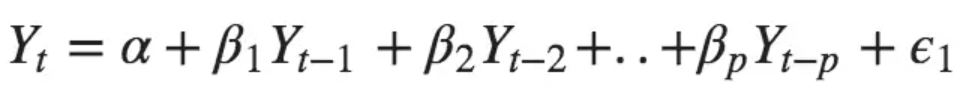

In [173]:
display.Image("D:\\nithin_study\\Time Series - ARIMA\\AR - Equation.PNG", width=400, height=300)

Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.

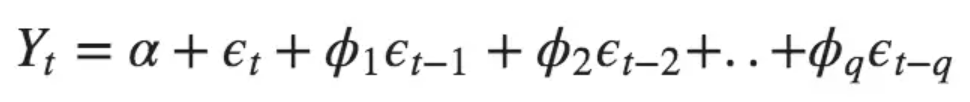

In [175]:
display.Image("D:\\nithin_study\\Time Series - ARIMA\\MA - Equation.PNG", width=400, height=300)

An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the equation becomes:

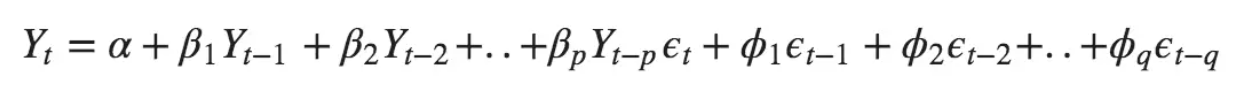

In [176]:
display.Image("D:\\nithin_study\\Time Series - ARIMA\\ARIMA - Equation.PNG", width=600, height=300)

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

### Fitting ARIMA model to predict 'open' sales

In [177]:
# Read USD_CAD dataset using pandas
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

df = pd.read_csv("TCS.csv", header=0, index_col=0, parse_dates=['Date'], date_parser=dateparse).fillna(0)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2014-01-01,TCS,EQ,2172.05,2180.1,2184.50,2151.10,2153.70,2153.30,2159.55,264976,5.720000e+13,15040,105354,0.3976
2014-01-02,TCS,EQ,2153.30,2166.0,2189.00,2156.15,2167.95,2167.00,2170.96,863474,1.870000e+14,60050,550431,0.6375
2014-01-03,TCS,EQ,2167.00,2164.7,2229.10,2147.25,2224.10,2222.20,2206.70,1309087,2.890000e+14,84697,660519,0.5046
2014-01-06,TCS,EQ,2222.20,2229.0,2244.00,2197.00,2234.80,2239.60,2224.18,1155905,2.570000e+14,75432,685611,0.5931
2014-01-07,TCS,EQ,2239.60,2240.0,2256.45,2199.00,2207.90,2206.15,2227.87,1448743,3.230000e+14,62312,891246,0.6152


In [104]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.780000e+14,87012,1345353,0.5402
2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.590000e+14,97077,849767,0.5775
2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.120000e+14,76017,847762,0.5172
2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.080000e+14,98275,837567,0.5166
2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.410000e+14,157829,1942473,0.6323


In [105]:
# Check dimension of the data
df.shape

(1810, 14)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1810 entries, 2014-01-01 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              1810 non-null   object 
 1   Series              1810 non-null   object 
 2   Prev Close          1810 non-null   float64
 3   Open                1810 non-null   float64
 4   High                1810 non-null   float64
 5   Low                 1810 non-null   float64
 6   Last                1810 non-null   float64
 7   Close               1810 non-null   float64
 8   VWAP                1810 non-null   float64
 9   Volume              1810 non-null   int64  
 10  Turnover            1810 non-null   float64
 11  Trades              1810 non-null   int64  
 12  Deliverable Volume  1810 non-null   int64  
 13  %Deliverble         1810 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 212.1+ KB


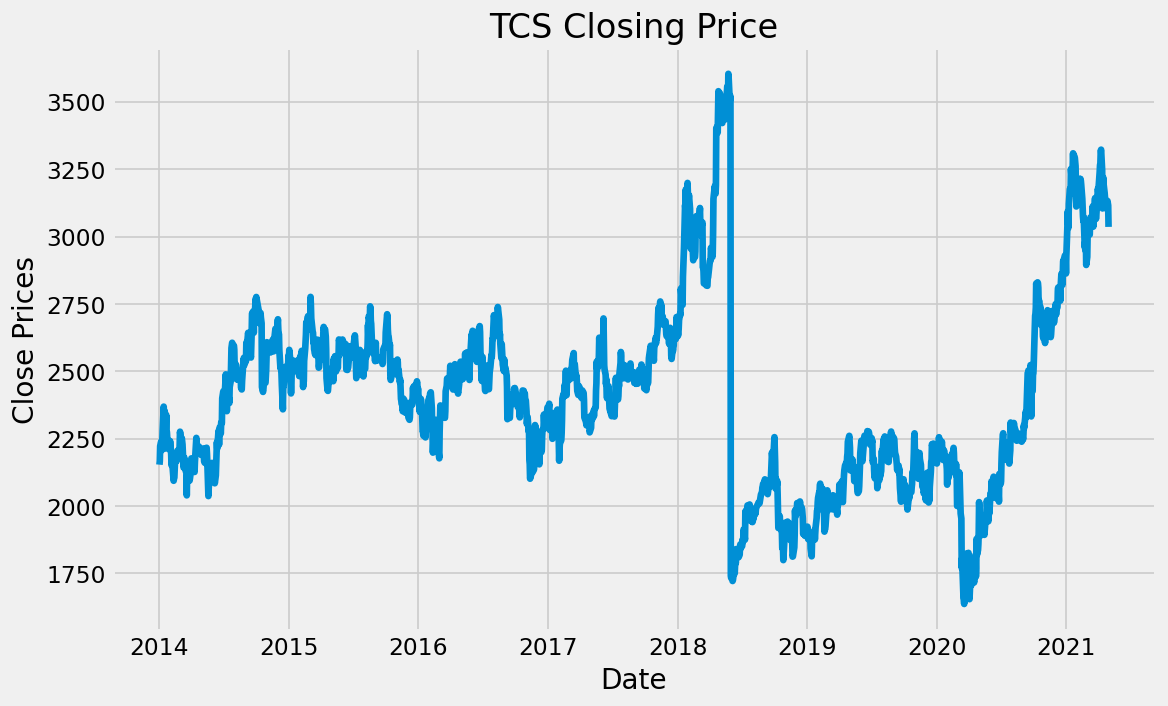

In [107]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('TCS Closing Price')
plt.show()

We can also visualize the data in our series through a probability distribution too.

<AxesSubplot:ylabel='Density'>

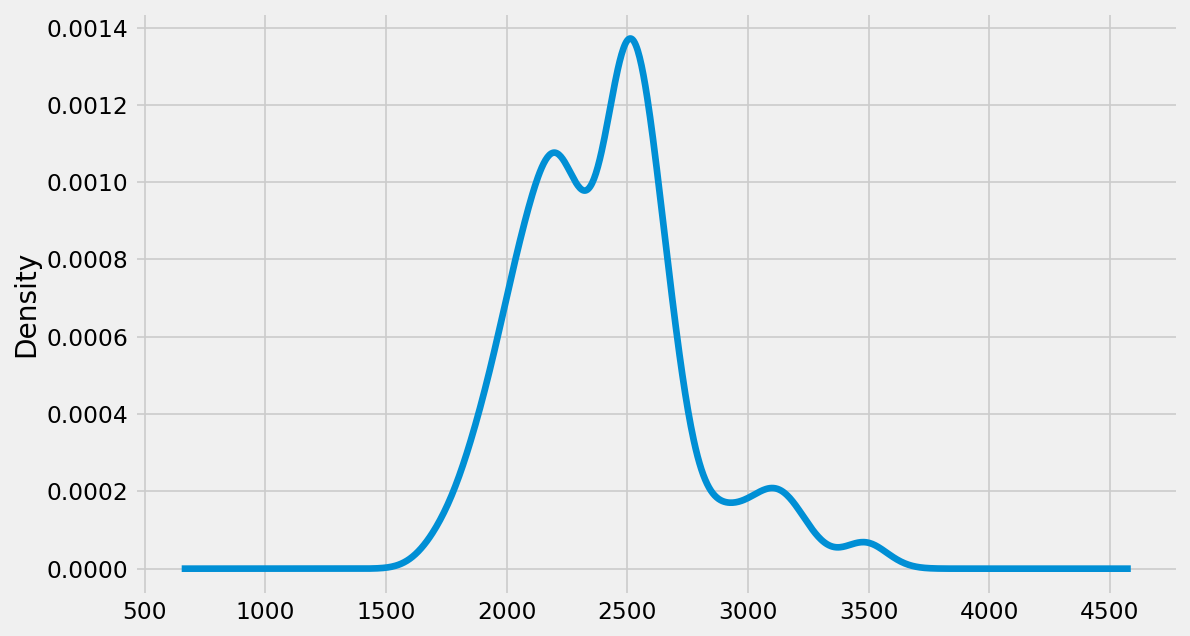

In [108]:
#Distribution of the dataset
df.Close.plot(kind='kde')

We need to check if a series is stationary or not because time series analysis only works with stationary data.

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

    Null Hypothesis: The series has a unit root (value of a =1)
    Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

Let's check for stationarity:

In [109]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

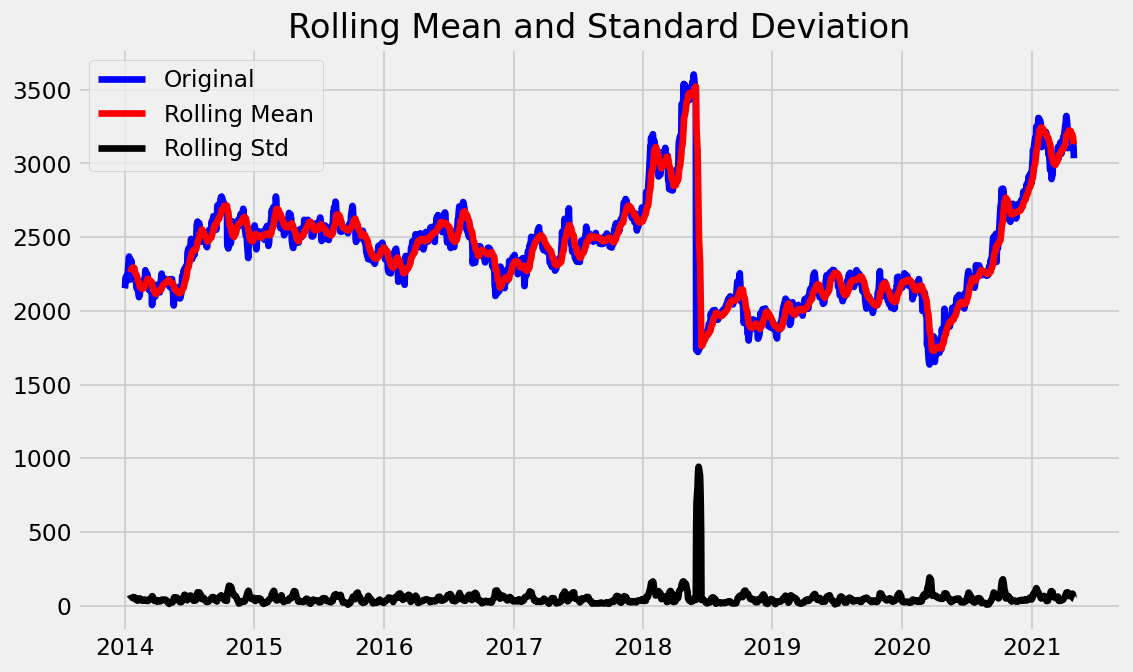

Results of dickey fuller test
Test Statistics                  -3.278441
p-value                           0.015870
No. of lags used                  0.000000
Number of observations used    1809.000000
critical value (1%)              -3.433970
critical value (5%)              -2.863139
critical value (10%)             -2.567621
dtype: float64


In [110]:
test_stationarity(df.Close)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

<Figure size 1200x720 with 0 Axes>

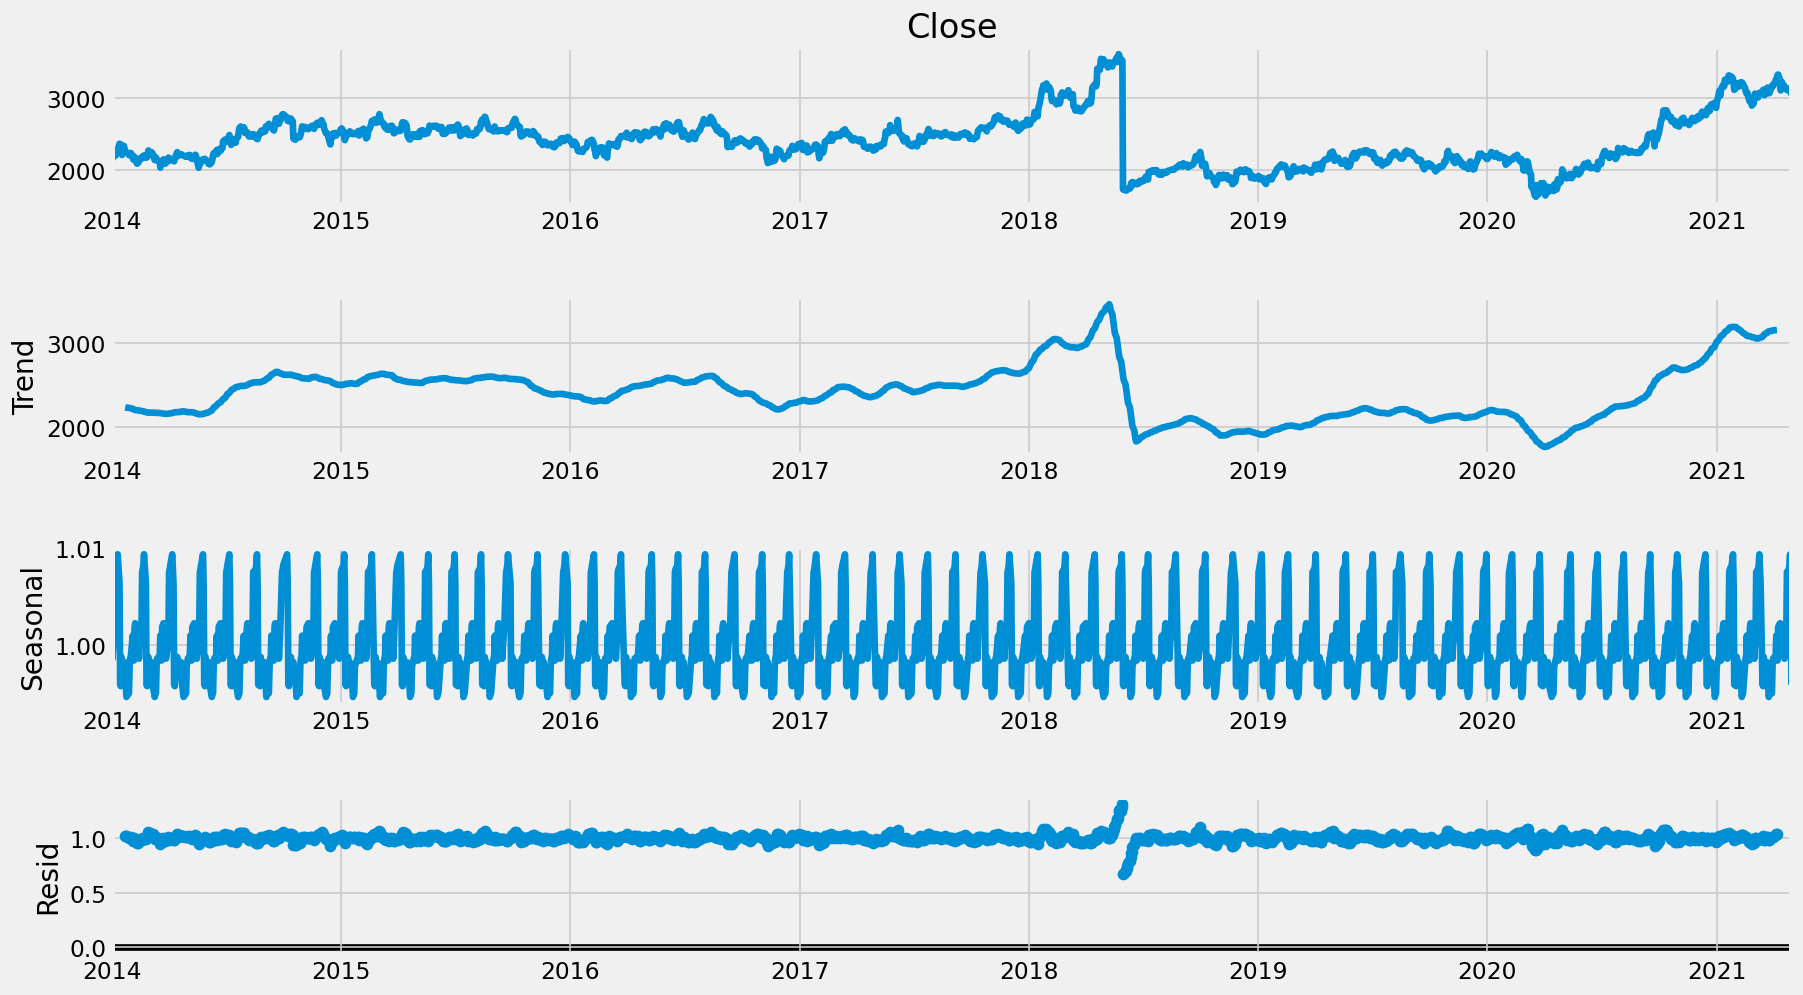

In [111]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df.Close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

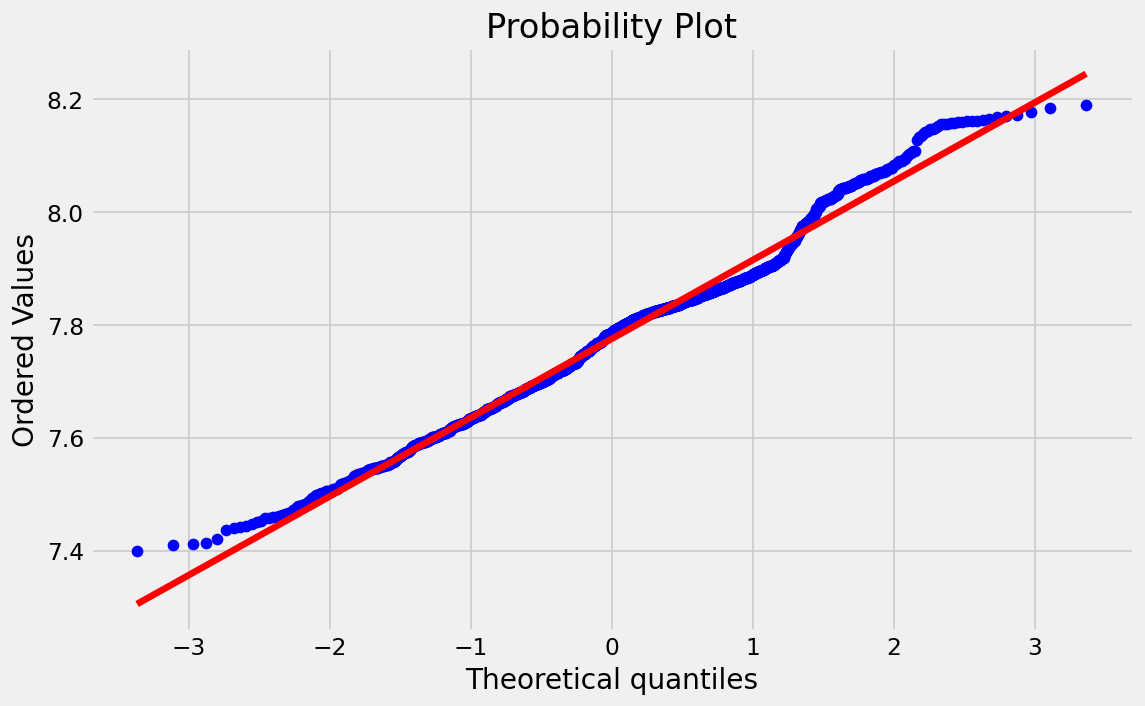

In [113]:
stats.probplot(np.log(df.Close), dist="norm", plot=pylab)
pylab.show()

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


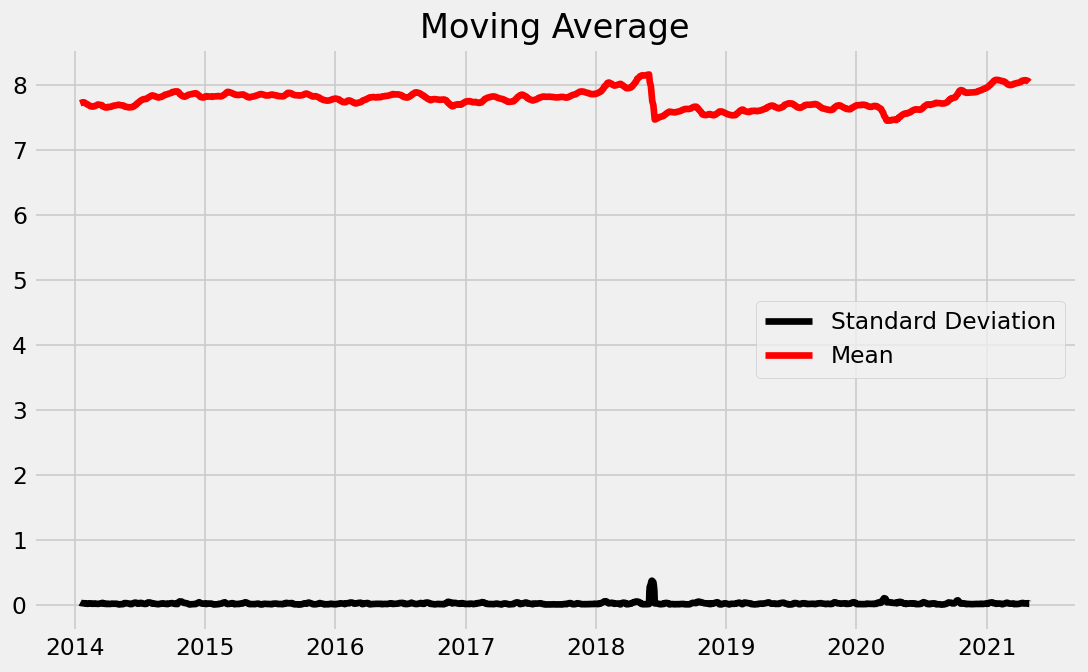

In [114]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df.Close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

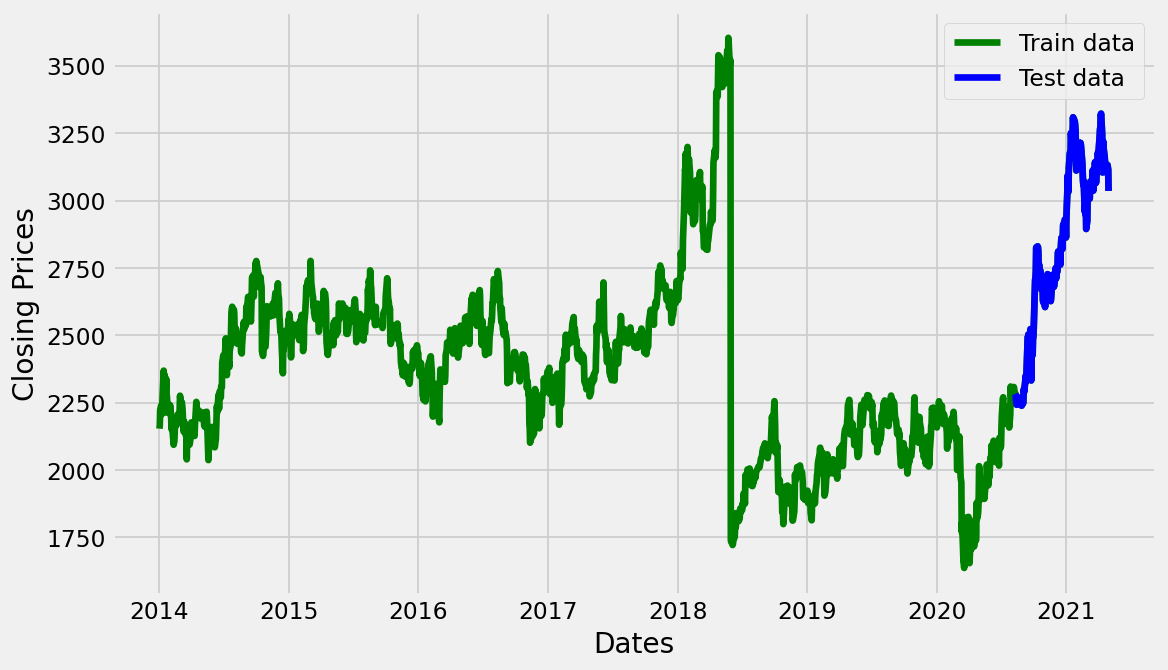

In [156]:
#split data into train and training set
train_data, test_data = df.Close[0:int(len(df.Close)*0.9)], df.Close[int(len(df.Close)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df.Close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Choose parameters p,q,d for ARIMA model. Use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

Auto ARIMA: Automatically discover the optimal order for an ARIMA model.
The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.

The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29952.472, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=17822.751, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=17823.848, Time=1.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=17824.394, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=25834.545, Time=3.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=17825.062, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17806.435, Time=0.92 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21477.811, Time=1.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17804.587, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23347.502, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17806.429, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   :

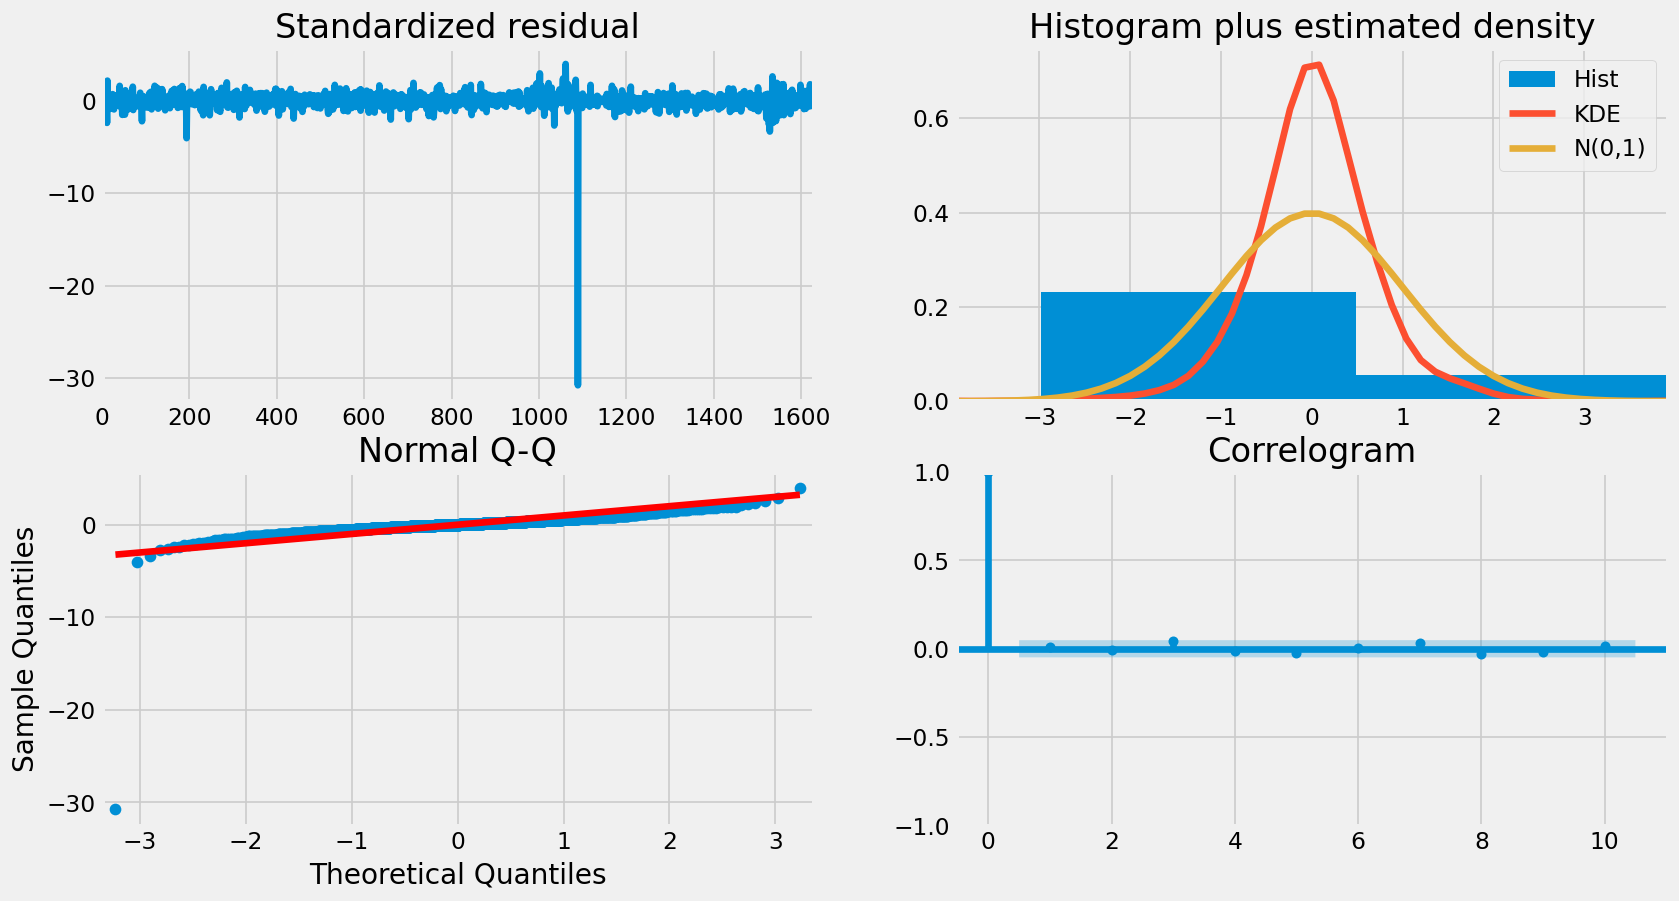

In [157]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit. So, let's use it to forecast.